In [80]:
#| title: Candidate- wise contribution count distribution
import pandas as pd
import numpy as np
import plotly.express as px  
import itables  

data = pd.read_csv("P00000001-ALL.csv")
df =data.dropna(subset=['contbr_st'])
#Use of groupby to get the number of occurances of all candidates 
#named it count to use it to plot pie chart
df_votes= df.groupby("cand_nm").size().reset_index(name="count")
df.shape


/var/folders/wb/_9jpjsld4kd4wj6gm2k1hnnc0000gn/T/ipykernel_25804/2330479004.py:7: DtypeWarning:

Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.



(1001727, 16)

In [81]:
#| title: Number of Contributions by State for Each Candidate
#Use of groupby to get state-wise contribution count for each candidate
df_state_cont = df.groupby(["cand_nm","contbr_st"]).size().reset_index(name='count')
df_state_cont

,cand_nm,contbr_st,count
0,"Bachmann, Michelle",AE,3
1,"Bachmann, Michelle",AK,56
2,"Bachmann, Michelle",AL,134
3,"Bachmann, Michelle",AP,3
4,"Bachmann, Michelle",AR,136
...,...,...,...
702,"Santorum, Rick",WI,643
703,"Santorum, Rick",WV,102
704,"Santorum, Rick",WY,157
705,"Santorum, Rick",XX,30


In [82]:
#| title: Total Contribution by State
#Use of groupby to get state-wise contribution count for each candidate
df_state_contribution = df.groupby(["contbr_st"]).agg({"contb_receipt_amt":"sum"}).reset_index()
df_state_contribution

,contbr_st,contb_receipt_amt
0,AA,51066.20
1,AB,2048.00
2,AE,118010.08
3,AF,495.00
4,AK,591919.67
...,...,...
69,WI,2066481.48
70,WV,612923.97
71,WY,702642.06
72,XX,448397.00


In [83]:
df_state_cont_sum = df.groupby(["cand_nm","contbr_st"]).agg({"contb_receipt_amt":"sum"}).reset_index()
fig = px.choropleth(df_state_cont_sum,locations="contbr_st", locationmode="USA-states", color="contb_receipt_amt", animation_frame='cand_nm',
    scope="usa",
    color_continuous_scale='plasma',
    labels={'contb_receipt_amt': 'Total cont'})
fig.show()

In [84]:
fig = px.choropleth(df_state_contribution,locations="contbr_st", locationmode="USA-states", color="contb_receipt_amt",
    scope="usa",
    color_continuous_scale='plasma',
    labels={'cand_nm': 'Candidate Name','contb_receipt_amt': 'Total contribution'},hover_data="contb_receipt_amt",title="Total Contribution Statewise Heatmap")
fig.update_layout(legend={"x" : 0.94, "y" : 1})

In [85]:
#plot a choropleth indicating contributor count state-wise
fig = px.choropleth(df_state_cont_sum,locations="contbr_st", locationmode="USA-states", color="contb_receipt_amt", animation_frame='cand_nm',
    scope="usa",
    color_continuous_scale='plasma',
    labels={'contb_receipt_amt': 'Total cont'})
fig.show()

In [86]:
df_state_cont_cand = df.groupby("cand_nm").agg({"contb_receipt_amt":"min"}).reset_index()
df_state_cont_cand

,cand_nm,contb_receipt_amt
0,"Bachmann, Michelle",-3022.00
1,"Cain, Herman",-5115.00
2,"Gingrich, Newt",-5000.00
3,"Huntsman, Jon",-2500.00
4,"Johnson, Gary Earl",0.88
5,"McCotter, Thaddeus G",-2000.00
6,"Obama, Barack",-30800.00
7,"Paul, Ron",-2521.50
8,"Pawlenty, Timothy",-5000.00
9,"Perry, Rick",-5000.00


In [87]:
#plot a choropleth indicating contributor count state-wise
fig = px.choropleth(df_state_cont,locations="contbr_st", locationmode="USA-states", color="count", animation_frame='cand_nm',
    scope="usa",
    color_continuous_scale='plasma',
    labels={'count': 'Number of Contributions'})
fig.show()

In [88]:
df_total_cont = df.groupby(by= "cand_nm")["contb_receipt_amt"].sum().reset_index()

#df_total_cont
total_bar= px.bar(df_total_cont ,x="cand_nm",y="contb_receipt_amt",orientation="v")
total_bar.show()

In [89]:
#| title: Month- wise contribution to candidates by contributors
#function to slice month and year from date
def get_month(x):
    return x[3:]

#performed data transformation by creating new column to get month and year of contribution

df["Month-yr"]= df["contb_receipt_dt"].map(get_month)

# performed Aggregation by summing contributions by month-year 
df_monthly_cont=df.groupby("Month-yr").agg({"contb_receipt_amt":"sum"}).reset_index()

#convert the Month-yr to date format, so that it can be sorted
df_monthly_cont["Month-yr"] = pd.to_datetime(df_monthly_cont["Month-yr"],format= "%b-%y")


df_monthly_cont= df_monthly_cont.sort_values(by="Month-yr")
#converted back to display in graph im Month-Year format
df_monthly_cont["Month-yr"] = df_monthly_cont["Month-yr"].dt.strftime('%b-%Y')
df_monthly_cont



/var/folders/wb/_9jpjsld4kd4wj6gm2k1hnnc0000gn/T/ipykernel_25804/724839690.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Month-yr,contb_receipt_amt
6,Jan-2011,60100.00
4,Feb-2011,40035.00
10,Mar-2011,557650.00
0,Apr-2011,11419361.60
12,May-2011,16128540.52
9,Jun-2011,25518398.34
8,Jul-2011,7861559.52
2,Aug-2011,16020416.65
15,Sep-2011,36239008.87
14,Oct-2011,17069703.60


In [90]:
df_monthly_cont_cand= df.groupby(["cand_nm","Month-yr"]).agg({"contb_receipt_amt":"sum"})
df_monthly_cont_cand

contb_receipt_amt
cand_nm            Month-yr                   
Bachmann, Michelle AUG-11            385088.50
                   DEC-11            410526.18
                   JAN-12             69519.12
                   JUL-11            368980.01
                   JUN-11            679527.00
...                                        ...
Santorum, Rick     MAR-12           2613550.32
                   MAY-11            122973.00
                   NOV-11            113276.45
                   OCT-11             98376.00
                   SEP-11            278308.00

[151 rows x 1 columns]

In [91]:
#Get Top 3 candidates with highest number of  appearences
top3_names = df["cand_nm"].value_counts().nlargest(3).index
top3_names

Index(['Obama, Barack', 'Paul, Ron', 'Romney, Mitt'], dtype='object', name='cand_nm')

(2) group the dataset by candidate names and the state information of contributors. (8 marks)



In [92]:
#get df but only with the candidates in top3
top3_table = df[df["cand_nm"].isin(top3_names)]

#group by to check the number of appearences from each state for each candidate in top 3
top3_contr= top3_table.groupby(["cand_nm","contbr_st"]).agg({"contbr_st":['count']})
top3_contr


contbr_st
                            count
cand_nm       contbr_st          
Obama, Barack AA               78
              AB                4
              AE              395
              AK             2046
              AL             3873
...                           ...
Romney, Mitt  WA             2404
              WI              720
              WV              203
              WY              390
              XX              242

[185 rows x 1 columns]

In [93]:
df_positive= df[df["contb_receipt_amt"]>0]
df_positive= df_positive.sort_values(by="contb_receipt_amt", ascending= False)
df_positive["contb_receipt_amt"].sum()
df["contb_receipt_amt"].sum()
(309531353.24-298751395.14)/298751395.14

0.03608337325068675

In [94]:
total_cont_positive= df_positive.groupby(["cand_nm","contbr_st"]).agg({"contb_receipt_amt":"sum"}).reset_index()
total_cont_positive

,cand_nm,contbr_st,contb_receipt_amt
0,"Bachmann, Michelle",AE,1750.00
1,"Bachmann, Michelle",AK,8235.50
2,"Bachmann, Michelle",AL,25812.00
3,"Bachmann, Michelle",AP,1225.00
4,"Bachmann, Michelle",AR,19156.00
...,...,...,...
699,"Santorum, Rick",WE,123.10
700,"Santorum, Rick",WI,141524.21
701,"Santorum, Rick",WV,20341.20
702,"Santorum, Rick",WY,48102.00


In [95]:
total_cont_range = df_positive[(df["contb_receipt_amt"]>0) & (df["contb_receipt_amt"]<300)]

total_cont_range=total_cont_range.sort_values(by="contb_receipt_amt", ascending= True)
total_cont_range.shape

/var/folders/wb/_9jpjsld4kd4wj6gm2k1hnnc0000gn/T/ipykernel_25804/2395840317.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



(809181, 17)

In [96]:
non_neg= df[df['contb_bins']=="Negative"]
non_neg.groupby(["cand_nm"]).agg({"contb_receipt_amt":"sum"})

KeyError: 'contb_bins'

In [ ]:
cand_statewise_count= df.groupby(["cand_nm","contbr_st"]).agg({"contb_receipt_amt":"sum"}).reset_index()
cand_statewise_count

,cand_nm,contbr_st,contb_receipt_amt
0,"Bachmann, Michelle",AE,1750.00
1,"Bachmann, Michelle",AK,8235.50
2,"Bachmann, Michelle",AL,25507.00
3,"Bachmann, Michelle",AP,1225.00
4,"Bachmann, Michelle",AR,19156.00
...,...,...,...
702,"Santorum, Rick",WI,133624.21
703,"Santorum, Rick",WV,19841.20
704,"Santorum, Rick",WY,47852.00
705,"Santorum, Rick",XX,25045.00


In [ ]:
cand_state_only= cand_statewise_count.groupby(["contbr_st","cand_nm"]).agg({"contb_receipt_amt":"sum"}).reset_index()
cand_state_only
cand_state_max= cand_state_only.groupby(["contbr_st"]).agg({ "contb_receipt_amt":"max"}).reset_index()
cand_state_maxf = pd.merge(cand_state_max, cand_state_only, on=["contbr_st", "contb_receipt_amt"], how="left")
cand_state_maxf



,contbr_st,contb_receipt_amt,cand_nm
0,AA,49505.00,"Obama, Barack"
1,AB,2048.00,"Obama, Barack"
2,AE,54186.33,"Paul, Ron"
3,AF,495.00,"Santorum, Rick"
4,AK,275353.15,"Obama, Barack"
...,...,...,...
69,WI,1114813.46,"Obama, Barack"
70,WV,167525.00,"Perry, Rick"
71,WY,236745.84,"Romney, Mitt"
72,XX,384250.00,"Romney, Mitt"


In [ ]:
fig = px.choropleth(cand_state_maxf,locations="contbr_st", locationmode="USA-states", color="cand_nm",
    scope="usa",
    color_continuous_scale='plasma',
    labels={'cand_nm': 'Candidate Name'},hover_data="contb_receipt_amt",title="Highest contribution earned by a candidate statewise")
fig.show()

In [ ]:
cand_state_maxf["cand_nm"].value_counts()

cand_nm
Obama, Barack     46
Romney, Mitt      17
Santorum, Rick     4
Paul, Ron          3
Perry, Rick        3
Gingrich, Newt     1
Name: count, dtype: int64

In [ ]:
df["contb_receipt_amt"].max()


np.float64(2014490.51)

In [ ]:
total_contribution_amount/float(df_positive["contb_receipt_amt"].count())


NameError: name 'total_contribution_amount' is not defined

/var/folders/wb/_9jpjsld4kd4wj6gm2k1hnnc0000gn/T/ipykernel_25804/4054065527.py:6: DtypeWarning:

Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.



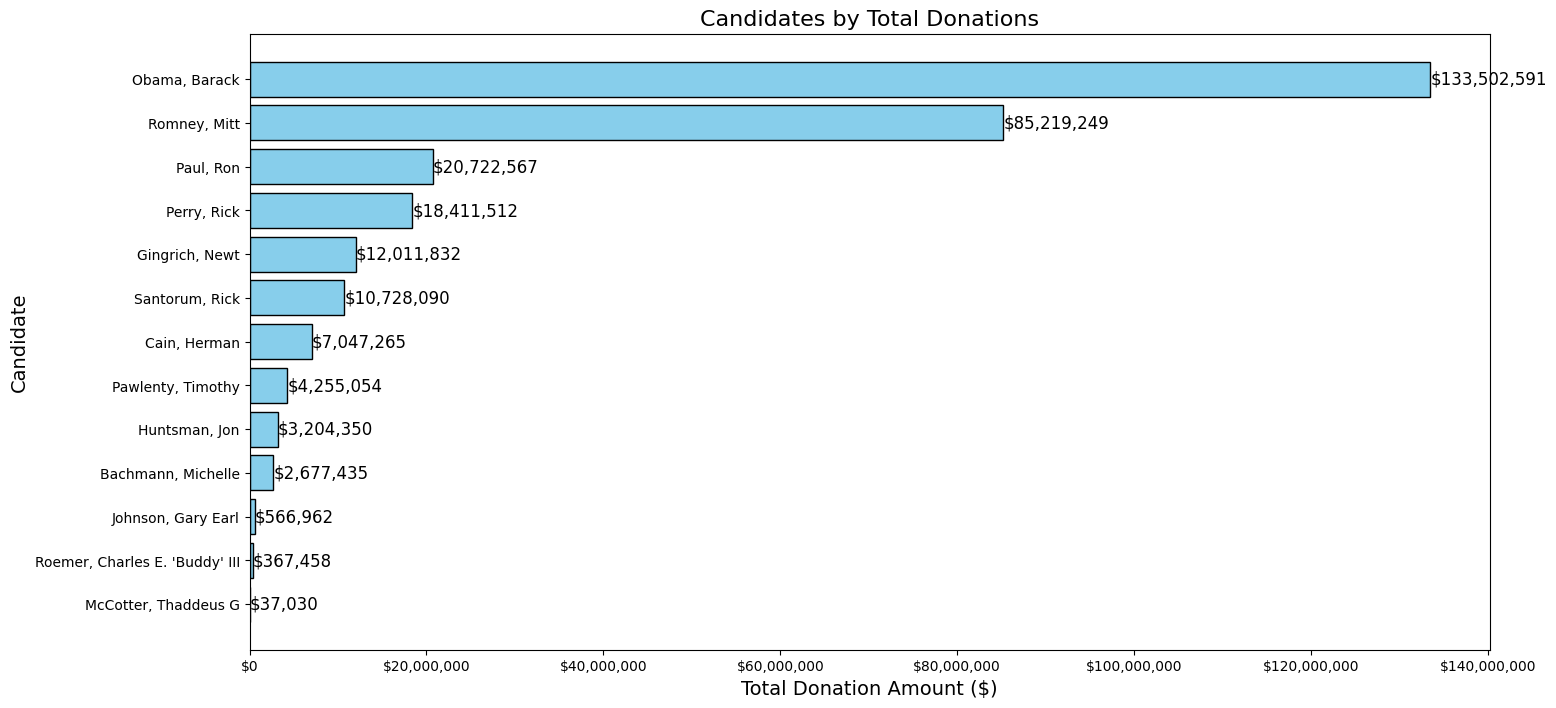

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker


df = pd.read_csv("P00000001-ALL.csv")
df_total_cont = df.groupby(by="cand_nm")["contb_receipt_amt"].sum().reset_index()
df_total_cont = df_total_cont.sort_values(by='contb_receipt_amt')
plt.figure(figsize=(16, 8))
bars = plt.barh(df_total_cont['cand_nm'], df_total_cont['contb_receipt_amt'], color='skyblue', edgecolor='black')
plt.title('Candidates by Total Donations', fontsize=16)
plt.xlabel('Total Donation Amount ($)', fontsize=14)
plt.ylabel('Candidate', fontsize=14)
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

for bar in bars:
    plt.text(
        bar.get_width(),                  
        bar.get_y() + bar.get_height() / 2, 
        f'${bar.get_width():,.0f}',        
        va='center',                       
        ha='left',                        
        fontsize=12                         
    )

plt.show()

/var/folders/wb/_9jpjsld4kd4wj6gm2k1hnnc0000gn/T/ipykernel_25804/4054065527.py:6: DtypeWarning:

Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.



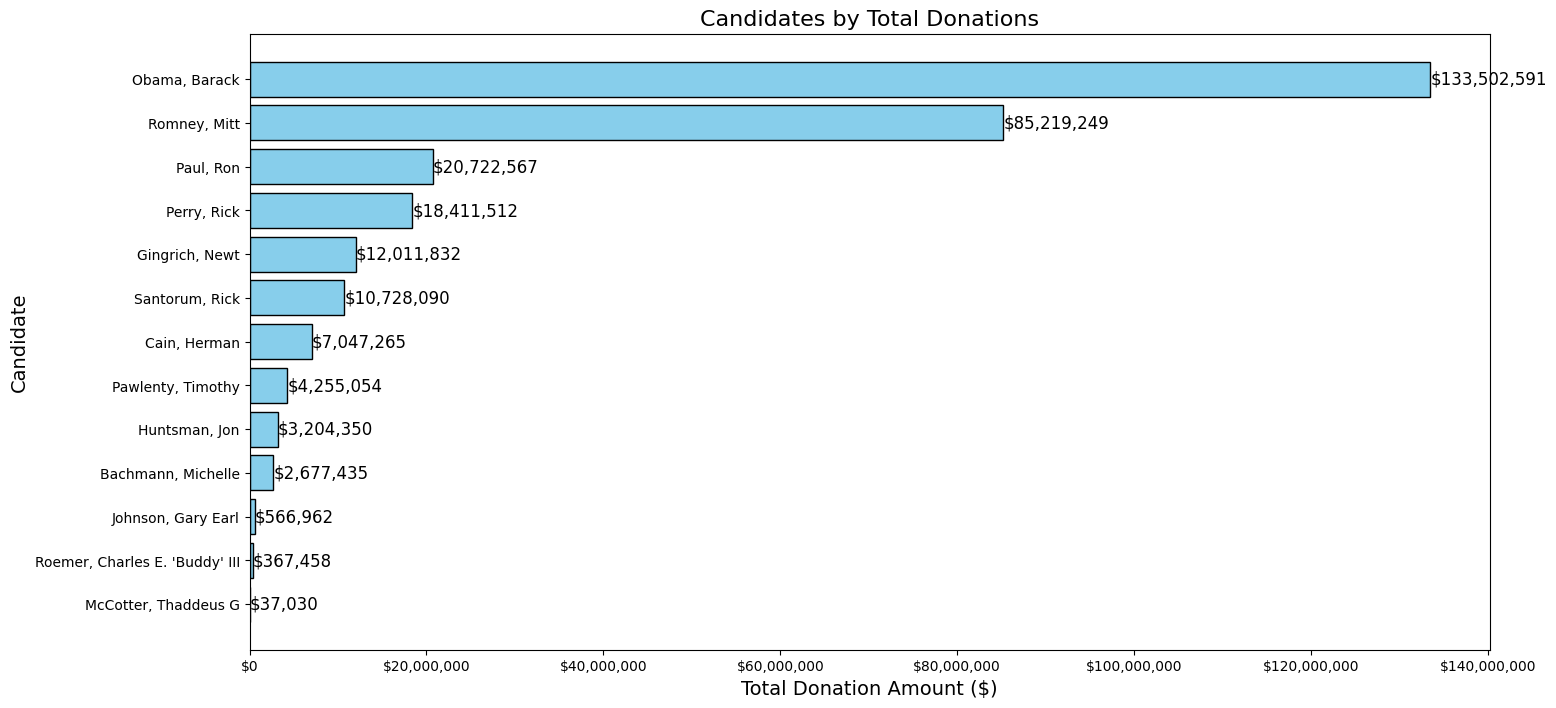

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker


df = pd.read_csv("P00000001-ALL.csv")
df_total_cont = df.groupby(by="cand_nm")["contb_receipt_amt"].sum().reset_index()
df_total_cont = df_total_cont.sort_values(by='contb_receipt_amt')
plt.figure(figsize=(16, 8))
bars = plt.barh(df_total_cont['cand_nm'], df_total_cont['contb_receipt_amt'], color='skyblue', edgecolor='black')
plt.title('Candidates by Total Donations', fontsize=16)
plt.xlabel('Total Donation Amount ($)', fontsize=14)
plt.ylabel('Candidate', fontsize=14)
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

for bar in bars:
    plt.text(
        bar.get_width(),                  
        bar.get_y() + bar.get_height() / 2, 
        f'${bar.get_width():,.0f}',        
        va='center',                       
        ha='left',                        
        fontsize=12                         
    )

plt.show()

In [98]:
bins = [-500000, 0, 100, 3000,5000000]
labels = ['Negative','Small (0-100)', 'Medium (100-3000)','Wealthy(3000-5000000)']

df['contb_bins'] = pd.cut(df['contb_receipt_amt'], bins=bins, labels=labels)

donation_bin = df['contb_bins'].value_counts()
donation_bin
#donation_count= donation_bin.to_dict()
#donation_count
df_wealthy = df[df["contb_bins"]=="Wealthy(3000-5000000)"]
df_wealthy=df_wealthy.groupby(["cand_nm","contbr_st"]).agg({"contb_receipt_amt":"sum"}).reset_index()
#df_wealthy
df_wealthy_max= df_wealthy.groupby(["contbr_st"]).agg({ "contb_receipt_amt":"max"}).reset_index()
df_wealthy_max
df_wealthy_merge = pd.merge(df_wealthy_max,df_wealthy , on=["contbr_st", "contb_receipt_amt"], how="left")
df_wealthy_merge 
fig = px.choropleth(df_wealthy_merge,locations="contbr_st", locationmode="USA-states", color="cand_nm",
    scope="usa",
    color_continuous_scale='plasma',
    labels={'cand_nm': 'Candidate Name'},hover_data="contb_receipt_amt",title="Highest contribution earned by a candidate statewise from wealthy")

fig.show()

In [99]:
from itables import show
bin_summary = df.groupby('contb_bins').agg(
    count=('contb_receipt_amt', 'count'),
    amount_contribution=('contb_receipt_amt', 'sum'),
).reset_index()

show(bin_summary)


/var/folders/wb/_9jpjsld4kd4wj6gm2k1hnnc0000gn/T/ipykernel_25804/4114100463.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [100]:
df_retired= df[df["contbr_occupation"]=="RETIRED"]
df_retired=df_retired.groupby(["cand_nm","contbr_st"]).agg({"contb_receipt_amt":"sum"}).reset_index()
#df_retired
df_retired_max= df_retired.groupby(["contbr_st"]).agg({ "contb_receipt_amt":"max"}).reset_index()
df_retired_max
df_retired_merge = pd.merge(df_retired_max,df_retired , on=["contbr_st", "contb_receipt_amt"], how="left")

fig = px.choropleth(df_retired_merge,locations="contbr_st", locationmode="USA-states", color="cand_nm",
    scope="usa",
    color_continuous_scale='plasma',
    labels={'cand_nm': 'Candidate Name'},hover_data="contb_receipt_amt",title="Highest contribution earned by a candidate statewise from Retired")
fig.show()

In [103]:

import seaborn as sns
from IPython.display import Markdown, display
Retired_table= df_retired_merge["cand_nm"].value_counts()
display(Markdown(Retired_table.to_markdown(index = False)))


ImportError: Missing optional dependency 'tabulate'.  Use pip or conda to install tabulate.

In [ ]:
df_small = df[df["contb_bins"]=="Small (0-100)"]
df_small=df_small.groupby(["cand_nm","contbr_st"]).agg({"contb_receipt_amt":"sum"}).reset_index()
#df_small
df_small_max= df_small.groupby(["contbr_st"]).agg({ "contb_receipt_amt":"max"}).reset_index()
df_small_max
df_small_merge = pd.merge(df_small_max,df_small , on=["contbr_st", "contb_receipt_amt"], how="left")
df_small_merge 
fig = px.choropleth(df_small_merge,locations="contbr_st", locationmode="USA-states", color="cand_nm",
    scope="usa",
    color_continuous_scale='plasma',
    labels={'cand_nm': 'Candidate Name'},hover_data="contb_receipt_amt",title="Highest contribution earned by a candidate statewise from small investors")
fig.show()

In [101]:
Small_table= df_small_merge["cand_nm"].value_counts().reset_index(name="States")

In [ ]:
df_wealthy_merge["cand_nm"].value_counts().reset_index(name="States")

,cand_nm,States
0,"Romney, Mitt",29
1,"Obama, Barack",9
2,"Pawlenty, Timothy",6
3,"Gingrich, Newt",5
4,"Perry, Rick",4
5,"Santorum, Rick",3
6,"Cain, Herman",1


In [ ]:
total_contribution_amount=float(df["contb_receipt_amt"].sum())

total_contribution_amount

298751395.14000005

In [ ]:
Retired_contribution= float(df_retired["contb_receipt_amt"].sum())
Retired_contribution_percentage= round(float(Retired_contribution*100/total_contribution_amount),2)
Retired_contribution_percentage

16.13

In [ ]:
small_contribution= float(df_small["contb_receipt_amt"].sum())
small_contribution_percentage= round(float(small_contribution*0.964*100/total_contribution_amount),2)
small_contribution_percentage

10.88

In [ ]:
wealthy_contribution= float(df_wealthy["contb_receipt_amt"].sum())
wealthy_contribution_percentage= round(float(wealthy_contribution*100/total_contribution_amount),2)
wealthy_contribution_percentage

6.0

In [ ]:
df_positive= df[df["contb_receipt_amt"]>0]
adjustment_percentage= round(((float(df_positive["contb_receipt_amt"].sum())/total_contribution_amount)-1)*100,2)
adjustment_percentage

3.61

In [ ]:
total_states= df["contbr_st"].unique().size
total_states

75

In [ ]:
candidates= df["cand_nm"].unique()
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)